<a href="https://colab.research.google.com/github/MeAmarP/yolo-on-OID/blob/master/OID_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/harshilpatel312/open-images-downloader.git

Cloning into 'open-images-downloader'...
remote: Enumerating objects: 36, done.
remote: Total 36 (delta 0), reused 0 (delta 0), pack-reused 36
Unpacking objects: 100% (36/36), done.


[Put on Some Music](https://vimeo.com/360535362)

In [2]:
# get the training data
!wget https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train-images-boxable.csv
!wget https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train-annotations-bbox.csv

# get the test data
!wget https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/test-annotations-bbox.csv
!wget https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/test-images.csv

#get labelmap
!wget https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/class-descriptions-boxable.csv

--2020-01-15 06:17:14--  https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train-images-boxable.csv
Resolving requestor-proxy.figure-eight.com (requestor-proxy.figure-eight.com)... 3.226.109.174, 35.153.56.60, 3.214.244.147
Connecting to requestor-proxy.figure-eight.com (requestor-proxy.figure-eight.com)|3.226.109.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216137230 (206M) [text/csv]
Saving to: ‘train-images-boxable.csv’

train-images-boxabl 100%[===================>] 206.12M   102MB/s    in 2.0s    

2020-01-15 06:17:16 (102 MB/s) - ‘train-images-boxable.csv’ saved [216137230/216137230]

--2020-01-15 06:17:19--  https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train-annotations-bbox.csv
Resolving requestor-proxy.figure-eight.com (requestor-proxy.figure-eight.com)... 3.226.109.174, 35.153.56.60, 3.214.244.147
Connecting to requestor-proxy.figure-eight.com (requestor-proxy.figure-eight.com)|3.226.109.1

In [0]:
!python /content/open-images-downloader/downloader/download.py --images=/content/train-images-boxable.csv --annots=/content/train-annotations-bbox.csv --objects Helmet --dir=/content/img_data --labelmap=/content/class-descriptions-boxable.csv


In [5]:
import os
len(os.listdir("/content/img_data"))

14697

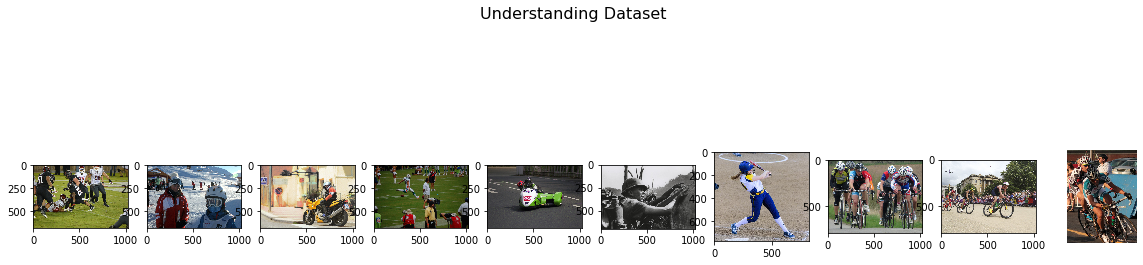

In [6]:
def displaySampleImages(PATH_TO_DIR,Nb_of_Img2Disp=None):
    """
    Display grid of sample images for every class in dataset.
    
    Args:
        PATH_TO_DIR(str): path to train or test dir.        
    """
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    mpl.rcParams['axes.titlesize'] = 8
    import glob
    import cv2
    #NoOfClasses = len(ALL_CLASS_NAMES)   
    fig = plt.figure(figsize=(20,20))
    # fig.subplots_adjust(hspace=0.7, wspace=0.1)
    fig.suptitle('Understanding Dataset', fontsize=16)
    for n,path in enumerate(glob.glob(PATH_TO_DIR+'/*.jpg')[:Nb_of_Img2Disp]):
      #print(ImagePath)
      Img = cv2.imread(path)
      ax = fig.add_subplot(10,10,(n+1))
      plt.imshow(cv2.cvtColor(Img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    return

displaySampleImages("/content/img_data",Nb_of_Img2Disp=10)



In [0]:
import pandas as pd
path_to_train_img_csv = "/content/train-images-boxable.csv"
path_to_train_imganno_csv = "/content/train-annotations-bbox.csv"
path_to_classmap_csv = "/content/class-descriptions-boxable.csv" 

# imgdata_df = pd.read_csv(path_to_train_img_csv)
imganno_df = pd.read_csv(path_to_train_imganno_csv)
  

In [0]:
print(imganno_df.head())
print("imganno_df.shape:",imganno_df.shape)
# print(imgdata_df.head())
# print("imgdata_df.shape:",imgdata_df.shape)

In [11]:
labelmap_df = pd.read_csv(path_to_classmap_csv,names=['classid','classname']) 
labelmap_df.head()

,classid,classname
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


In [0]:
#===============================================================================
### DEPRECATED: To save each of the bbox details in .txt file
#===============================================================================
# from tqdm import tqdm
# for imgid in tqdm(train_helmet_anno_df.ImageID.unique()):
#   df=train_helmet_anno_df.loc[train_helmet_anno_df.ImageID == imgid ]
#   df=df[['imgclass','XMin', 'XMax', 'YMin','YMax']]
#   path_to_save = '/content/helmet_anno_files/'+imgid+'.txt'
#   df.to_csv(path_to_save, header=None, index=None, sep=' ')

# #check no of file generated
# import os
# len(os.listdir('/content/helmet_anno_files'))

#===============================================================================
### DEPRECATED: To move image and .txt files together ina single dir
#===============================================================================
# from tqdm import tqdm
# import shutil

# path_src_dir = '/content/drive/My Drive/train/'
# path_dst_dir = '/content/helmet_img_files/'
# file_extn = '.jpg'

# for imgid in tqdm(train_helmet_anno_df.ImageID.unique()):
#   shutil.move(path_src_dir+imgid+file_extn, path_dst_dir+imgid+file_extn)

# import os
# len(os.listdir('/content/helmet_img_files'))

In [12]:
#===============================================================================
### ACTIVE: To Get Helmet CLass specific data
#===============================================================================
classid = labelmap_df[labelmap_df.classname == 'Helmet'].classid
print("ClassID for Helmet Class:",classid)
train_helmet_anno_df = imganno_df.loc[imganno_df.LabelName == '/m/0zvk5']
train_helmet_anno_df['imgclass'] = 0
train_helmet_anno_df=train_helmet_anno_df.reset_index(drop=True)
print(train_helmet_anno_df.head())


#Print no of unique image ids
print("Count of ImageId:", train_helmet_anno_df.ImageID.nunique())
print("dframe Size", train_helmet_anno_df.shape)
print("Column Names:",train_helmet_anno_df.columns)
print("\n\n")

ClassID for Helmet Class: 600    /m/0zvk5
Name: classid, dtype: object
            ImageID  Source LabelName  ...  IsDepiction  IsInside  imgclass
0  00001bcc92282a38  xclick  /m/0zvk5  ...            0         0         0
1  000023aa04ab09ed  xclick  /m/0zvk5  ...            0         0         0
2  000134de87dd044b  xclick  /m/0zvk5  ...            0         0         0
3  000134de87dd044b  xclick  /m/0zvk5  ...            0         0         0
4  000134de87dd044b  xclick  /m/0zvk5  ...            0         0         0

[5 rows x 14 columns]
Count of ImageId: 7608
dframe Size (16502, 14)
Column Names: Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'imgclass'],
      dtype='object')





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
#ImageID of Image files in a local dir for Class "Helmet"
imgdirids = [imgid.split('.')[0] for imgid in os.listdir("/content/img_data")]
# len(set(train_helmet_anno_df.ImageID.unique()).intersection(set(imgdirids)))

(186, 58)
(385, 308)


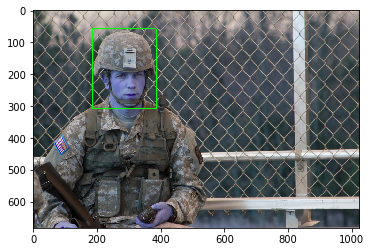

In [24]:
# Add .jpg to ImageID

# train_helmet_anno_df['ImageID'] = train_helmet_anno_df['ImageID']+'.jpg'

#keep relevent columns only remove others
select_cols = ['ImageID', 'LabelName', 'XMin', 'XMax', 'YMin','YMax','imgclass']
train_helmet_anno_df = train_helmet_anno_df[select_cols]

train_helmet_anno_df['bbox_cx'] = (train_helmet_anno_df['XMax'] + train_helmet_anno_df['XMin'])/2.0
train_helmet_anno_df['bbox_cy'] = (train_helmet_anno_df['YMax'] + train_helmet_anno_df['YMin'])/2.0
train_helmet_anno_df['bbox_w'] = train_helmet_anno_df['XMax'] - train_helmet_anno_df['XMin']
train_helmet_anno_df['bbox_h'] = train_helmet_anno_df['YMax'] - train_helmet_anno_df['YMin']

print(train_helmet_anno_df.head())

                ImageID LabelName      XMin  ...   bbox_cy    bbox_w    bbox_h
0  00001bcc92282a38.jpg  /m/0zvk5  0.181875  ...  0.268762  0.194375  0.366792
1  000023aa04ab09ed.jpg  /m/0zvk5  0.272727  ...  0.131731  0.417930  0.263462
2  000134de87dd044b.jpg  /m/0zvk5  0.003125  ...  0.064259  0.088125  0.128518
3  000134de87dd044b.jpg  /m/0zvk5  0.200625  ...  0.060038  0.105625  0.120075
4  000134de87dd044b.jpg  /m/0zvk5  0.623125  ...  0.413696  0.078125  0.095684

[5 rows x 11 columns]


In [34]:
import cv2
from tqdm import tqdm

train_helmet_anno_df['img_w']=''
train_helmet_anno_df['img_h']=''
for idx,row  in tqdm(train_helmet_anno_df.iterrows()):  
  path_to_img ="/content/img_data/"+row['ImageID']
  h,w,_ = (cv2.imread(path_to_img)).shape
  train_helmet_anno_df.at[idx,'img_w'] = w
  train_helmet_anno_df.at[idx,'img_h'] = h

print(train_helmet_anno_df.shape)
print(train_helmet_anno_df.head())


16502it [04:26, 61.94it/s]

(16502, 13)
                ImageID LabelName      XMin  ...    bbox_h  img_w  img_h
0  00001bcc92282a38.jpg  /m/0zvk5  0.181875  ...  0.366792   1024    683
1  000023aa04ab09ed.jpg  /m/0zvk5  0.272727  ...  0.263462   1024    672
2  000134de87dd044b.jpg  /m/0zvk5  0.003125  ...  0.128518   1024    683
3  000134de87dd044b.jpg  /m/0zvk5  0.200625  ...  0.120075   1024    683
4  000134de87dd044b.jpg  /m/0zvk5  0.623125  ...  0.095684   1024    683

[5 rows x 13 columns]


Below code to validate our results, regarding the bbox format required by YOLO

(186, 58)
(385, 308)
199.03999999999996
250.518936


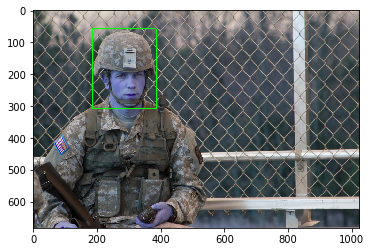

In [48]:
# Write routine to display labelled objects in training image dataset
# This is just to understand and check how to normalize-dnormalize bbox values

import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img = cv2.imread("/content/img_data/00001bcc92282a38.jpg")
h,w,_ = img.shape

for _,row in train_helmet_anno_df[train_helmet_anno_df.ImageID == "00001bcc92282a38.jpg"].iterrows():
  ## print(row[['YMin', 'XMin', 'YMax', 'XMax']].values.tolist())
  pxl_xmin = int(row['XMin']*w)
  pxl_xmax = int(row['XMax']*w)
  pxl_ymin = int(row['YMin']*h)
  pxl_ymax = int(row['YMax']*h)
  print((pxl_xmin,pxl_ymin))
  print((pxl_xmax,pxl_ymax))
  img = cv2.rectangle(img,(pxl_xmin,pxl_ymin),(pxl_xmax,pxl_ymax),(0,255,0),2)
plt.imshow(img)
# cv2_imshow(img)

print("BoundigBow_W in pxl",train_helmet_anno_df.bbox_w[0]*train_helmet_anno_df.img_w[0])
print("BoundigBow_H in pxl",train_helmet_anno_df.bbox_h[0]*train_helmet_anno_df.img_h[0])